In [14]:
import torch
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

import os
import re
import csv

In [11]:
def get_image_mask_pairs(subjects, rgb_path, mask_path):
    '''
    Match images with labels in the csv file.
    '''
    images = []
    masks = []
    for patient in subjects:
        for file in os.listdir(rgb_path):
            if re.match(patient[0], file):
                images.append(os.path.join(rgb_path, file))
                masks.append(os.path.join(mask_path, file))
    return images, masks

In [12]:
google_path = '.'
path = os.path.join(google_path, 'QC')
train_test_path = os.path.join(path, 'split')
mask_path = os.path.join(path, "mask")
rgb_path = os.path.join(path, "rgb")

# Load training and validation csv files
def load_subjects(csv_path):
    with open(csv_path, newline='') as f:
        reader = csv.reader(f)
        subjects = list(reader)
    return subjects[1:]

train_subjects = load_subjects(os.path.join(train_test_path, 'train_subjects.csv'))
val_subjects = load_subjects(os.path.join(train_test_path, 'validate_subjects.csv'))

train_images, train_masks = get_image_mask_pairs(train_subjects, rgb_path, mask_path)
val_images,   val_masks   = get_image_mask_pairs(val_subjects, rgb_path, mask_path)

In [15]:
ind = 0
img = cv.imread(train_images[0])
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

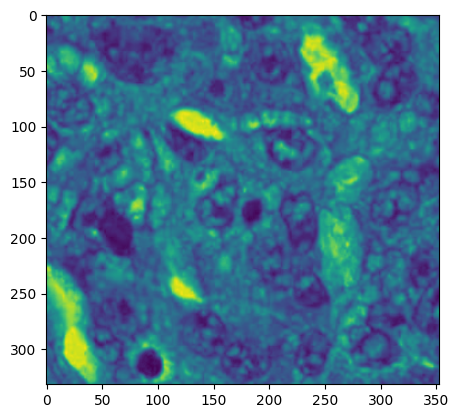

In [16]:
plt.imshow(img)

In [ ]:
model_path  = os.path.join('./checkpoints/sam2.1_hiera_tiny.pt')
config_path = os.path.join('configs/sam2.1/sam2.1_hiera_t.yaml')

predictor = SAM2ImagePredictor(build_sam2(config_path))

with torch.inference_mode(), torch.autocast("cpu", dtype=torch.bfloat16):
    predictor.set_image(img)
    masks, _, _ = predictor.predict("Segment cells")

AssertionError: Torch not compiled with CUDA enabled